<a href="https://colab.research.google.com/github/pejmanrasti/PythonLibraries/blob/main/Audio/torchaudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

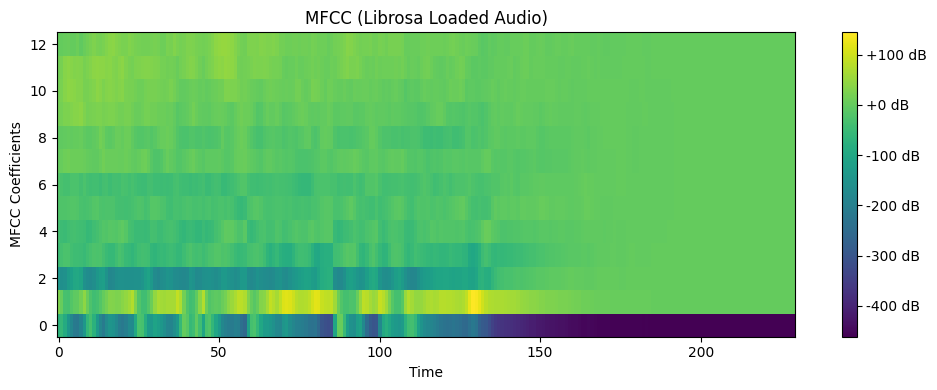

In [1]:
import librosa
import torch
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file with librosa
file_path = librosa.example('trumpet')  # Example audio file
y, sr = librosa.load(file_path, sr=None)  # Load with its original sampling rate

# Convert the numpy array (y) to a PyTorch tensor
waveform = torch.tensor(y).unsqueeze(0)  # Add channel dimension

# Compute MFCCs using torchaudio
mfcc_transform = T.MFCC(
    sample_rate=sr,
    n_mfcc=13,
    melkwargs={'n_fft': 2048, 'hop_length': 512, 'n_mels': 128}
)
mfccs = mfcc_transform(waveform)

# Plotting the MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(mfccs[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (Librosa Loaded Audio)')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()
